# Метод Монте-Карло в физике

Методом Монте-Карло называют целую множество различных метоедов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
#%matplotlib notebook
rndm = np.random.RandomState(12345)

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
(10% от общей оценки)

Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)} R^d
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [9]:
def getSphereVolumeExact(d, r = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R рекурентным методом

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    return np.pi**(d/2)/sp.gamma(1+d/2)*r**d


1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

2.0
3.141592653589793
4.188790204786391
4.1887902047863905


<function matplotlib.pyplot.show(*args, **kw)>

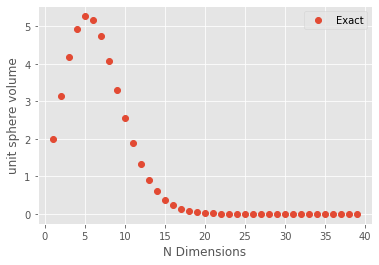

In [10]:
# Write your code and answer here
#for i in range(1,10):
#    r = rndm.uniform(0.1,100)
#    print("via MC: {:.4}, via maths: {:.4}".format(getSphereVolumeExact(i,r), V(i,r)))


#for i in range(1,10):
#    r = rndm.uniform(0.1,100)
#    print("via MC: {:.4}, via maths: {:.4}".format(getSphereVolumeExact(i,r), V(i,r)))
for i in range(1,4):
    print(getSphereVolumeExact(i))
print(4/3*np.pi)


D = np.arange(1, 40, dtype=np.int32)
plt.plot(D, getSphereVolumeExact(D), "o", label="Exact")
plt.xlabel("N Dimensions")
plt.ylabel("unit sphere volume")
plt.legend()
plt.show

### Задание 1.2
(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [11]:
def getSphereVolumePseudorandom(N, d, r = 1.):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    ar = rndm.uniform(low=-1, high=1,size=(d, N))
    a = np.zeros(N)
    for i in range(d):
        a += ar[i,:]**2    
    a = a <= 1.
    V = ((2*r)**d)*(np.count_nonzero(a)/N)   #Фактор с радиусом для того, чтобы учесть объем гиперкуба
    return V

Постройте график зависимости числа узлов $N$ при котором достигается относительная точность порядка $10^{-8}$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$. Для нахождения соответствующего $N$ используйте алгоритм удвоения $N$, который вы использовали для оценки точности интегралов в 6-ой домашней работе.

1
2
3
4
5
6
7
8
9
10
11


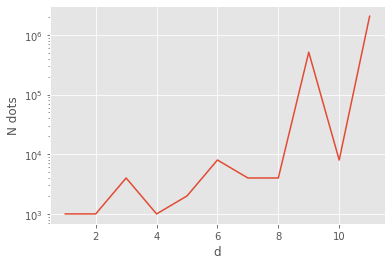

In [21]:
# Write your code and answer here
def eps(vex,vran):
    return (vex-vran)/vex

D = 11
n1 = np.empty(D)
num = np.arange(D)+1

for d in range(1,D+1):
    N = 1000
    V = getSphereVolumeExact(d)
    v = getSphereVolumePseudorandom(N,d)
    while abs(eps(V,v))>1e-2:
        N *= 2
        v = getSphereVolumePseudorandom(N, d)
    n1[d-1] = N
    print(d)
plt.plot(num, n1, "-", label="Число точек от размерности")
plt.yscale("log")
plt.xlabel("d")
plt.ylabel("N dots")
plt.show()

### Задание 1.3

(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq` выполните команду 
`pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [13]:
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [14]:
sobol_seq.i4_sobol_generate?

Signature: sobol_seq.i4_sobol_generate(dim_num, n, skip=0)
Docstring:
i4_sobol_generate generates a Sobol dataset.

Parameters:
  Input, integer dim_num, the spatial dimension.
  Input, integer N, the number of points to generate.
  Input, integer SKIP, the number of initial points to skip.

  Output, real R(M,N), the points.
File:      ~/.local/lib/python3.7/site-packages/sobol_seq/sobol_seq.py
Type:      function


In [15]:
def getSphereVolumeQuasirandom(N, d, r = 1.):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    ar = sobol_seq.i4_sobol_generate(d,N)
    a = np.zeros(N)
    for i in range(d):
        a += ar[:,i]**2    
    a = a <= 1.
    V = ((2*r)**d)*(np.count_nonzero(a)/N)   #Фактор с радиусом для того, чтобы учесть объем гиперкуба
    return V

Сравните точность вчисления объема для квазислучайной погрешности, построив такой же график $N(D)$ при которых достигается точность $10^{-8}$, как для псевдослучайных чисел.

1
2
3
4
5
6
7
8
9
10
11


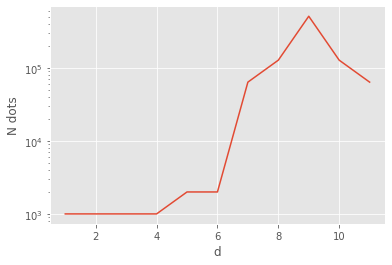

In [22]:
# Write your code and answer here
D = 11
n2 = np.empty(D)
num = np.arange(D)+1

for d in range(1,D+1):
    N = 1000
    V = getSphereVolumeExact(d)
    v = getSphereVolumeQuasirandom(N,d)
    while abs(eps(V,v))>1e-2:
        N *= 2
        v = getSphereVolumeQuasirandom(N, d)
    print(d)
    n2[d-1] = N
plt.plot(num, n2, "-", label="Число точек от размерности")
plt.yscale("log")
plt.xlabel("d")
plt.ylabel("N dots")
plt.show()


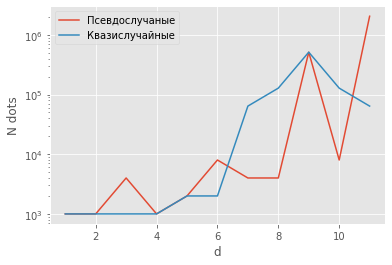

In [28]:
plt.plot(num, n1, "-", label="Псевдослучаные")
plt.plot(num, n2, "-", label="Квазислучайные")
plt.yscale("log")
plt.xlabel("d")
plt.legend()
plt.ylabel("N dots")
plt.show()

Сделайте выводы об эффективности квазислучайных последовательностей. 

# Write your code and answer here
При квазислучайном выборе точек алгоритм более стабильный и меньше зависит от того, насколько я везучий, что, собственно хорошо видно из картинок, потому что у соболя практически всегда рост монотонный. В свою очередь псевдорандомные числа очень зависят от того, как их раскидает, потому что я запускал несколько раз и количество точек очень сильно скакало. Отметим также, что на больших размерностях, очевидно, лучше будет использовать квазислучайные числа

## Задание 2

(50% от общей оценки)

Рассмотрим решетку $n\times n$ в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние когда все спины одинаково ориентированы. Однако при ненлевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблемотичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):

1. Задаем случайное начальное состояние

2. Выбираем случайную ячейку

3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.

4. Если изменение энергии отрицательное, оставляем спин перевернутым

5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью с вероятностью $\exp(-\delta E/kT)$

6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [6]:
def getInitialState(n):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    return rndm.choice([-1,1],(n,n))

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [7]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    #de=0.
    #n = state.shape[0]
    #state11 = np.hstack((state,state,state))
    #state11 = np.vstack((state11,state11,state11))
    #de = -(state11[i+n+1,j+n]+state11[i+n,1+j+n]+state11[i+n-1,j+n]+state11[i+n,-1+j+n])*state[i,j] 
    #if i!=0 and j!=0 and i!=N and j!=N:
    #    dE = -(np.sum(state1)-state[i,j])*state[i,j]
    #elif i==0 and j!=N and j!=0:
    #    dE = -(np.sum(state1)-state[i,j]+np.sum(state[N,j-1:j+1]))*state[i,j]
    #elif i==N and j!=N and j!=0:
    #    dE = -(np.sum(state1)-state[i,j]+np.sum(state[0,j-1:j+1]))*state[i,j]
    #elif j==0 and i!=0 and i!=N:
    #    dE = -(np.sum(state1)-state[i,j]+np.sum(state[i-1:i+1,N]))*state[i,j]
    #elif j==N and i!=0 and i!=N:
    #    dE = -(np.sum(state1)-state[i,j]+np.sum(state[i-1:i+1,0]))*state[i,j]
    #elif i==0 and j==0: 
    #    dE = -(np.sum(state1)-state[i,j]+np.sum(state[N,0:2]+state[0:2,N])+state[N,N])*state[i,j]
    #elif i==N and j==0:
    #    dE = -(np.sum(state1)-state[i,j]+np.sum(state[0,0:2]+state[N-2:N,N])+state[0,N])*state[i,j]
    #elif j==N and i==0:
    #    dE = -(np.sum(state1)-state[i,j]+np.sum(state[N,N-2:N]+state[0:2,0])+state[N,0])*state[i,j]
    #elif i==N and j==N:
    #    dE = -(np.sum(state1)-state[i,j]+np.sum(state[0,N-2:N]+state[N-2:N,0])+state[0,0])*state[i,j]
    state1 = np.hstack((state,state,state))
    state1 = np.vstack((state1, state1, state1))
    n = state.shape[0]
    e = -state[i,j]*(state1[n+i+1,n+j]+state1[n+i-1,n+j]+state1[n+i,n+j-1]+state1[n+i,n+j+1])
    return -2*e    

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. Можете использовать как псевдослучайную, так и квазислучайную последовательность, на ваш выбор. 

Обратите внимание, что если вам нужно сгенерировать большое количество случайных чисел и далее использовать их в цикле, то быстрее будет за один раз сгенерировать нужное количество случайных чисел и потом использовать их, чем генерировать их по одному в цикле. 

In [8]:
def makeFlip(tt, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    #n = state.shape[0]-1
    #i_ar, j_ar = rndm.random_integers(low=0,high=n,size=(2,n**2))
    #uni_ar = rndm.uniform(low=0.,high=1.,size=(n**2))
    #de_array = np.empty(n**2)
    #state1 = state.copy() 
    #for a in range(n**2):
    #    de_array[a] = getDeltaE(i_ar[a],j_ar[a],state)
    #prob_array = np.zeros_like(uni_ar,dtype=np.int32)
    #prob_array[np.exp(-de_array/T)<=uni_ar] = 1 
    ##   prob_array[prob_array>unit_ar] = 0 #np.zeros_like(prob_array[prob_array>unit_ar], dtype=np.int32)
    #prob_array[de_array<0] = 0 
    #prob_array = np.int32(prob_array)
    #for a in range(n**2):
    #    if prob_array[a]==1:
    #        state1[i_ar[a],j_ar[a]] = -state[i_ar[a],j_ar[a]]
    nn = state.shape[0]-1
    i_ar, j_ar = rndm.randint(low=0, high=nn+1, size=(2,nn**2))
    uni_ar = rndm.uniform(0,1,size=nn**2)
    for a in range(nn**2):
        de = getDeltaE(i_ar[a], j_ar[a], state)
        if de>0 and uni_ar[a]>np.exp(-de/tt):
            continue
        state[i_ar[a],j_ar[a]] = -state[i_ar[a],j_ar[a]]
    return state   

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [6]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    #E = 0.
    #nn = state.shape[0]-1
    #n = nn+1
    #for i in range(nn):
    #    for j in range(nn):         
    #        state11 = np.hstack((state,state,state))
    #        state11 = np.vstack((state11,state11,state11))
    #        E += -(state11[i+n+1,j+n]+state11[i+n,1+j+n]+state11[i+n-1,j+n]+state11[i+n,-1+j+n])*state[i,j] 
    E = 0.
    nn = state.shape[0]-1
    for i in range(nn):
        for j in range(nn):
            E += getDeltaE(i, j, state)/(-2)    
    return E/2

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [7]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

Далее задаются начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина в течение которых система приводится к равновесному сосотоянию, обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина в течение на которых рассчитывается значения энергии и намагниченности, нужно для усреднения случайных значений

Подберите наибольшие значения этих параметров таким образом, что бы ваша программа выполнялась выполнялась за разумно короткое время 

In [8]:
N       = 50        # размер решетки NxN
Nt      = 50        # количество точек температуры
eqSteps = 800       # количество раз выполнения makeFlip для установления равновесия
steps   = 50         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5., Nt); 
E, M , cv = np.zeros(Nt), np.zeros(Nt), np.zeros(Nt)

Далее представлен основной блок программы, соединяющий всё написанное выше в одно целое. Здесь, в цикле по точкам температуры, задается случайное начальное состояние, приводится к равновесному, и далее вычисляется средние значения энергии и намагниченности, и строится их график.

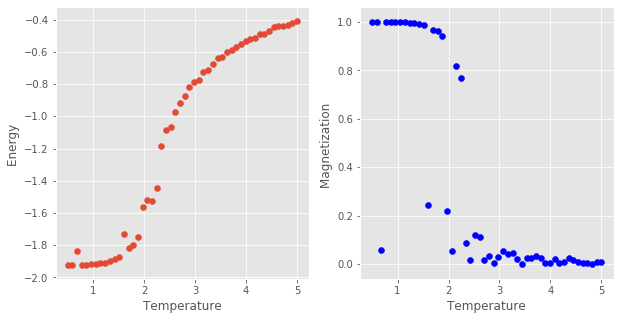

In [9]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    state2 = state.copy()
    
    for i in range(eqSteps):         # установление статистического равновесия
        state = makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        state = makeFlip(T[t], state)  
        w = getEnergy(state)
        Esum += w     
        Msum += getMagnetization(state)    

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)
    
print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описыввают ли они поведение феромагнетиков и фазовые переходы?

С точки зрения физики, могу говорить только за то, что смог нагуглить, потому что статфиз это не совсем та наука, которую можно освоить, имея лишь посредственное знание квантовой механики, ради того, чтобы ответить на добавочный вопрос по вычфизу.

При это в принципе полученный результат в принципе похож на нагугленные теоретические: 
$$\langle M\rangle=\left(1-\sinh\left(\frac{2}{T}\right)^{-4}\right)^{\frac{1}{8}}$$
Притом, как и ожидается при больших температурах система ведёт себя всё более хаотически, скатываясь от детерминированной к случайной. Разброс же объясняется тем, что аналитический результат очень грустный на температурах порядка двойки

Растущая энергия, в принципе тоже кажется логичной, так как сначала она лежит в абсолютном минимуме, а в результате, кажется, выходит на насыщение


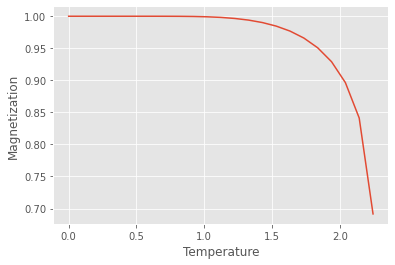

In [5]:
t = np.linspace(0.,5.,50)
m_av = (1-np.sinh(2/t)**(-4))**(1/8)
plt.plot(t, m_av, label="Theory")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.show()

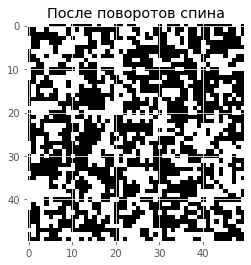

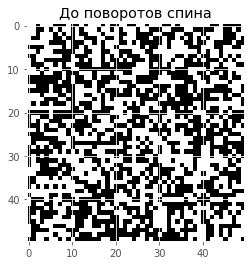

In [10]:
# Write your answer here
plt.imshow(state, cmap="binary")
plt.title("После поворотов спина")
plt.show()
plt.imshow(state2, cmap="binary")
plt.title("До поворотов спина")
plt.show()

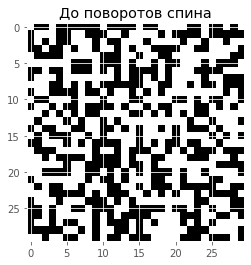

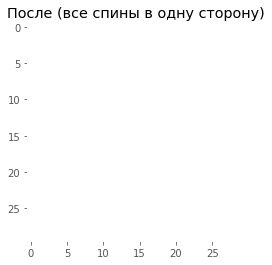

In [11]:
state = getInitialState(30)
plt.imshow(state, cmap="binary")
plt.title("До поворотов спина")
plt.show()
for i in range(500):         # установление статистического равновесия
    state = makeFlip(0.0005, state)

plt.imshow(state, cmap="binary")
plt.title("После (все спины в одну сторону)")
plt.show()

Дополнительно. Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое. 

<Figure size 432x288 with 0 Axes>

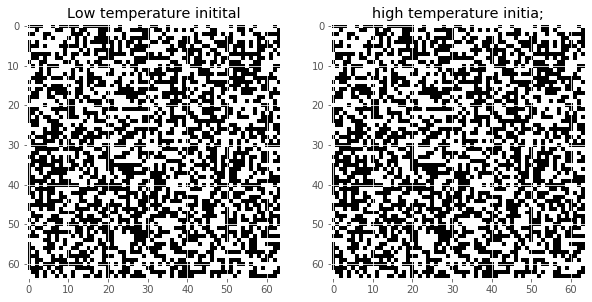

<Figure size 432x288 with 0 Axes>

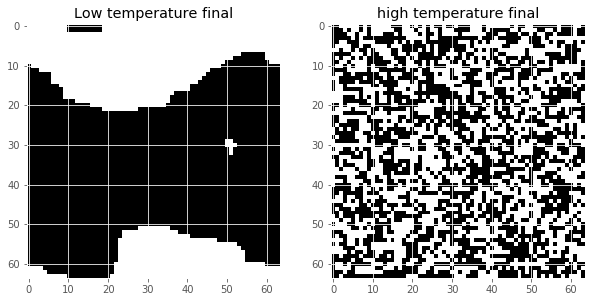

In [12]:
N = 64
state_low = getInitialState(N)
state_high = state_low.copy()

plt.figure()
# Write your code here
_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].imshow(state_low, cmap="binary")
ax[0].set_title("Low temperature initital");


ax[1].imshow(state_high, cmap="binary")
ax[1].set_title("high temperature initia;");
plt.show()
for _ in range(100):
    makeFlip(0.01, state_low)
    makeFlip(10., state_high)

plt.figure()
# Write your code here
_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].imshow(state_low, cmap="binary")
ax[0].set_title("Low temperature final");


ax[1].imshow(state_high, cmap="binary")
ax[1].set_title("high temperature final");
plt.show()

# Write your answer here
При больших температурах система становится всё остаётся хаотической, а при малых температурах становится более детерминированной, то есть все спины пытаются свалиться в одинаковое состояние